# Pandas Explode

In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

/Users/haticekar/Desktop/anaconda/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Example

#### Why `df.explode()` is needed?
Here's a fake dataset of 3 job postings.

#### ✅ Ne yapıyor? -- Aşağıdaki Kod 
1. Her meslek için sahip olunan yetenekleri (skills) bir liste olarak tanımlıyor.
2. Her satırdaki job_skills, bir liste (list) şeklinde.


In [4]:
data = {
    "job_title_short" : ["Data Analyst", "Data Scientist", "Data Engineer"],
    "job_skills" : [["excel","sql","python"], ["python","r"], ["aws","python","airflow"]]
}
df_skills = pd.DataFrame(data)
df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


#### ✅ Ne yapıyor adım adım? - Aşağıdaki Kod 
1. 🔹 df_skills.copy():
Orijinal tabloyu korumak için bir kopya alıyor.

2. 🔹 for row in df_skill_lists.itertuples():
Satır satır geziyor.

3. 🔹 for skill in row.job_skills::
O satırdaki skill listesindeki her beceriye tek tek bakıyor.

4. 🔹 df_skill_lists[skill] = df_skill_lists["job_skills"].apply(lambda x : skill in x):
Örneğin skill = 'python' olduğunda, şunu yapıyor:
"python" her satırdaki job_skills listesinde var mı?
Varsa True, yoksa False

5. 🔹 .astype(int):
True → 1, False → 0

6. 🔹 df_skill_lists.loc["Total"] = df_skill_lists.sum():
Her beceri sütununun toplamını alır (kaç kişi biliyor).

If we wanted to analyze the skills in this we'd need a minimum of 5 lines of code to get the counts of skills.

In [5]:
df_skill_lists = df_skills.copy()

for row in df_skill_lists.itertuples():
    for skill in row.job_skills:
        df_skill_lists[skill] = df_skill_lists["job_skills"].apply(lambda x : skill in x)
        df_skill_lists[skill] = df_skill_lists[skill].astype(int)
df_skill_lists.loc["Total"] = df_skill_lists.sum()
df_skill_lists.iloc[:, 2:]

,excel,sql,python,r,aws,airflow
0,1,1,1,0,0,0
1,0,0,1,1,0,0
2,0,0,1,0,1,1
Total,1,1,3,1,1,1


However, exploding it out makes the data a lot easier to work with.

* Aşağıdaki çıktıda şu oldu:

Orijinal index'ler:
1. Data Analyst satırı index = 0
2. Data Scientist satırı index = 1
3. Data Engineer satırı index = 2

In [6]:
df_exploded = df_skills.explode("job_skills")
df_exploded

,job_title_short,job_skills
0,Data Analyst,excel
0,Data Analyst,sql
0,Data Analyst,python
1,Data Scientist,python
1,Data Scientist,r
2,Data Engineer,aws
2,Data Engineer,python
2,Data Engineer,airflow


Now we can perform value_counts and even plot it.

In [7]:
df_exploded.value_counts("job_skills")

job_skills
python     3
airflow    1
aws        1
excel      1
r          1
sql        1
Name: count, dtype: int64

<Axes: xlabel='job_skills'>

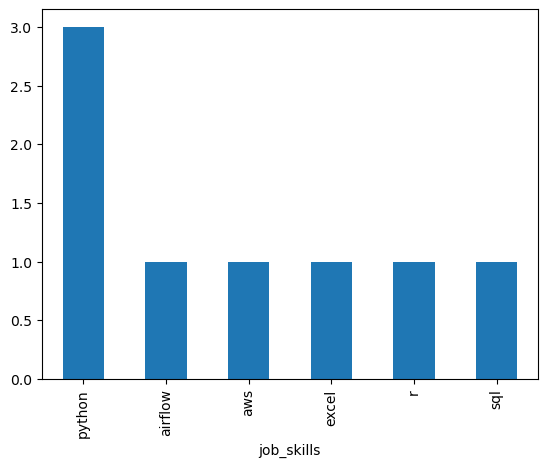

In [9]:
df_exploded.value_counts("job_skills").plot(kind="bar")

## Notes

* `explode()` - transforms each element of a list-like to a row
* Expand list-like data within a DataFrame column into separate rows. 
* Commonly used to split list data into individual rows for analysis (*hint* *hint*) or when working with JSON data in a DataFrame.

## Example

Let's transform the list like elements in the `job_skills` column to a row using the `explode()` function. This will make it so each skill will have its own row and we'll save this into a new DataFrame called `df_exploded`.

In the last section we already prepared our data and we converted our `job_skills` column to a list.

In [10]:
# Convert string representation to actual list, checking for NaN values first
df["job_skills"] = df["job_skills"].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x)
df[["job_title_short", "job_skills"]].head()

,job_title_short,job_skills
0,Senior Data Engineer,None
1,Data Analyst,"[r, python, sql, nosql, power bi, tableau]"
2,Data Engineer,"[python, sql, c#, azure, airflow, dax, docker,..."
3,Data Engineer,"[python, c++, java, matlab, aws, tensorflow, k..."
4,Data Engineer,"[bash, python, oracle, aws, ansible, puppet, j..."


Now we're going to apply the `explode()` function onto each skill and make each skill have its own row.

In [ ]:
# Explode 'job_skills' so each skill gets its own row
df_exploded = df.explode("job_skills")

In [13]:
df_exploded["job_skills"]

0               None
1                  r
1             python
1                sql
1              nosql
             ...    
785739         kafka
785739    kubernetes
785739        docker
785740           aws
785740          flow
Name: job_skills, Length: 3777320, dtype: object

And now let's visualize it by getting the `value_counts()` of each skill.

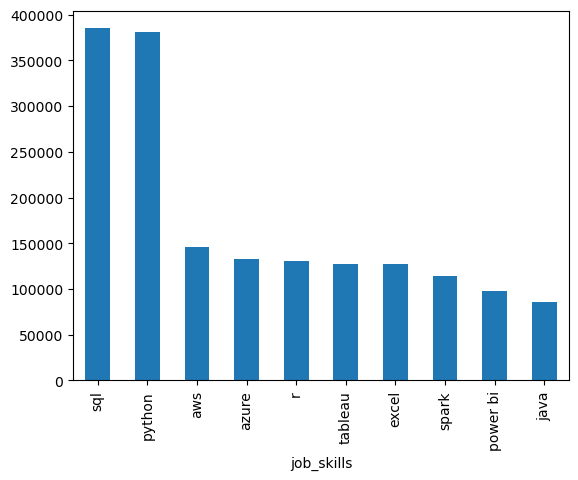

In [25]:
df_exploded["job_skills"].value_counts().head(10).plot(kind="bar")
plt.show()

### Calculate Skill Count

1. Then clean up the skills. We already did this in our last example.

In [26]:
# Explode job_skills column
df_skills = df_skills.explode("job_skills")


2. Now we'll calculate the skill count for each data job.

In [28]:
# Group by job_skills and job_title_short and count the number of occurrences
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

print('Type of skills_count: ', type(skills_count))
skills_count

Type of skills_count:  <class 'pandas.core.series.Series'>


job_skills  job_title_short          
airflow     Business Analyst               318
            Cloud Engineer                 260
            Data Analyst                  2002
            Data Engineer                25505
            Data Scientist                3915
                                         ...  
zoom        Machine Learning Engineer       46
            Senior Data Analyst             86
            Senior Data Engineer           122
            Senior Data Scientist           79
            Software Engineer              229
Length: 2256, dtype: int64

3. We'll `reset_index` to transform skills_count from a Series to a DataFrame.

In [30]:
# Name the count column as count
df_skills_count = skills_count.reset_index(name="skill_count") # we need to rename the main Series value to count
df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Business Analyst,318
1,airflow,Cloud Engineer,260
2,airflow,Data Analyst,2002
3,airflow,Data Engineer,25505
4,airflow,Data Scientist,3915
...,...,...,...
2251,zoom,Machine Learning Engineer,46
2252,zoom,Senior Data Analyst,86
2253,zoom,Senior Data Engineer,122
2254,zoom,Senior Data Scientist,79


4. We'll prep for plotting by the data getting in descending order.

In [24]:
df_skills_count.sort_values(by="skill_count", inplace = True)
df_skills_count

,job_skills,job_title_short,skill_count
1915,symfony,Senior Data Analyst,1
356,couchdb,Senior Data Analyst,1
401,datarobot,Cloud Engineer,1
1093,monday.com,Machine Learning Engineer,1
440,delphi,Cloud Engineer,1
...,...,...,...
1823,sql,Data Scientist,78982
1821,sql,Data Analyst,92428
1479,python,Data Engineer,108022
1822,sql,Data Engineer,113130


5. Finally, we'll graph the top 10 skills using a bar chart.

In [45]:
job_title = "Data Analyst"
head_value = 20

df_skill_final = df_skills_count[df_skills_count["job_title_short"]==job_title].head(head_value)
df_skill_final

,job_skills,job_title_short,skill_count
2,airflow,Data Analyst,2002
12,airtable,Data Analyst,88
22,alteryx,Data Analyst,4570
32,angular,Data Analyst,376
41,angular.js,Data Analyst,2
49,ansible,Data Analyst,186
59,apl,Data Analyst,53
69,arch,Data Analyst,63
79,asana,Data Analyst,176
89,asp.net,Data Analyst,181


<function matplotlib.pyplot.show(close=None, block=None)>

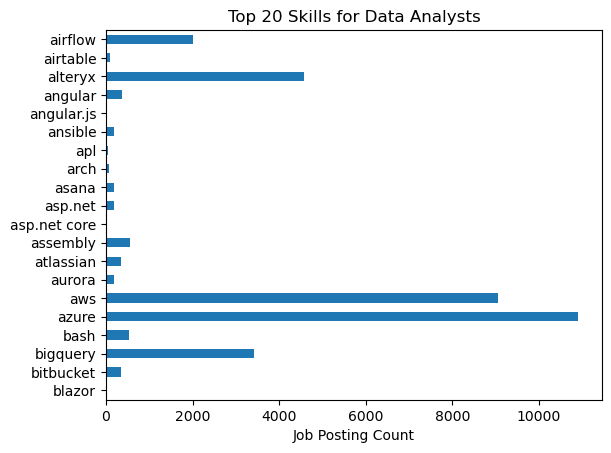

In [46]:
df_skill_final.plot(kind="barh", x="job_skills", y="skill_count")
plt.xlabel("Job Posting Count")
plt.ylabel("")
plt.title(f'Top {head_value} Skills for {job_title}s')
plt.gca().invert_yaxis() # To display the highest value on top
plt.legend().set_visible(False)
plt.show

### pandas.DataFrame.explode
DataFrame.explode(column, ignore_index=False)[source]
* Transform each element of a list-like to a row, replicating index values.

1. columnIndexLabel ---> 
Column(s) to explode. For multiple columns, specify a non-empty list with each element be str or tuple, and all specified columns their list-like data on same row of the frame must have matching length.

2. ignore_indexbool, default False --->
If True, the resulting index will be labeled 0, 1, …, n - 1.